# AI, Machine Learning and Python

To learn about AI and machine learning, first we want to remind everyone of how functions work in python

In [124]:
# This is a very simple function that works out percentages.
# You pass it in two numbers, called parameters. These represent the numerator and denominator of a fraction.
# Some simple maths is done, and the fraction is returned.  

def calculate_percentage(numerator, denominator):
    fraction = numerator / denominator
    return fraction * 100

# When you run this code snippet nothing will happen, you need to call the function for it to return you something.

In [126]:
calculate_percentage(20,200)

10.0

A lot of the code we are about to use uses functions. We get these functions from libraries which we can import.

In [116]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [22]:
# We are about to use the load_breast_cancer function from sklearn to learn about 
# This line calls the function to return:

#breast_cancer_inputs  - This is the raw data containing information about different breast cancer screenings
#breast_cancer_outputs - This contains the classification of whether each screening is identified as being breast cancer

breast_cancer_inputs, breast_cancer_outputs = load_breast_cancer(return_X_y=True, as_frame=True) 

In [23]:
# What does the data look like?
display(breast_cancer_inputs)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


This data is quite confusing to look at, are there better ways to visualise it?


In [122]:
def produce_scatter_plot(input_dataframe: pd.DataFrame,
                         output_series: pd.Series,
                         columns:list):
    """Produces a 2D or 3D scatter plot based on columns from dataframe.

    Args:
        input_dataframe (pd.DataFrame): The dataframe containing breast cancer information
        output_series (pd.Series): The dataframe containing diagnosis information
        columns (list): The columns to plot.
    """
    
    colours = pd.Series("True" if  value else False for value in output_series)

    if len(columns) == 3:
        fig = px.scatter_3d(input_dataframe, x='worst concave points', y='worst area', z='compactness error', color=colours, symbol =colours, labels={"color": "Diagnosis", "Symbol": "Diagnosis"})

    if len(columns) == 2:
        fig = px.scatter(input_dataframe, x='worst concave points', y='worst area', color=colours, symbol =colours, labels={"color": "Diagnosis", "Symbol": "Diagnosis"})

    fig.update_traces(marker=dict(size = 4 if len(columns) == 3 else 10,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
    
                  selector=dict(mode='markers'))
    
    fig.show()

In [123]:
produce_scatter_plot(breast_cancer_inputs, breast_cancer_outputs,["mean area","mean smoothness"])

Does this tell us anything about whether an individual likely has breast cancer? 

In [121]:
produce_scatter_plot(breast_cancer_inputs,breast_cancer_outputs,['worst concave points', 'worst area', 'compactness error'])

In [120]:
produce_scatter_plot(breast_cancer_inputs,breast_cancer_outputs,['worst concave points', 'worst area'])

Whilst there are some trends between some variables, with others it is very hard to see.

It would take days for a human to try and classify whether an individual has breast cancer.

### Can we use machine learning to accurately predict whether someone has breast cancer? 

In [ ]:
from sklearn.model_selection import train_test_split

# When creating a machine learning model, it is important to have some training data and some testing data.

# training data - this is data that is used to train the model.
# testing data - this is data used to test the model.

# The following function splits our data randomly to test and trainnig data.
breast_cancer_inputs_training, breast_cancer_inputs_testing, breast_cancer_outputs_training, breast_cancer_outputs_testing = train_test_split(breast_cancer_inputs, breast_cancer_outputs)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# This is one example of a classification model, called a random forest classifier.
# Others are available
classification_model = RandomForestClassifier()

In [ ]:
classification_model.fit(breast_cancer_inputs_training,breast_cancer_outputs_training)

RandomForestClassifier()

In [ ]:
predictions = classification_model.predict(breast_cancer_inputs_testing)

What do the predictions actually look like? Lets make another function

In [ ]:
print(predictions)

[1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0
 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1
 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0]


In [ ]:
def plot_predictions(predictions, actual):

    correct_predictions = 0
    incorrect_predictions = 0

    for prediction, value in zip(predictions, actual):
        if prediction == value:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

    total_predictions = len(predictions)

    #Remember our function we made earlier!
    correct_percentage = round( calculate_percentage(correct_predictions,total_predictions) ,1)
    incorrect_percentage = round( calculate_percentage(incorrect_predictions,total_predictions), 1)

    plt.pie([correct_predictions,incorrect_predictions],
            labels=[f"Correct Predictions\n{correct_percentage}",f"Incorrect Predictions\n{incorrect_percentage}%"])
             
    plt.title("Percentage of Correct and Incorrect Predictions")
    
    

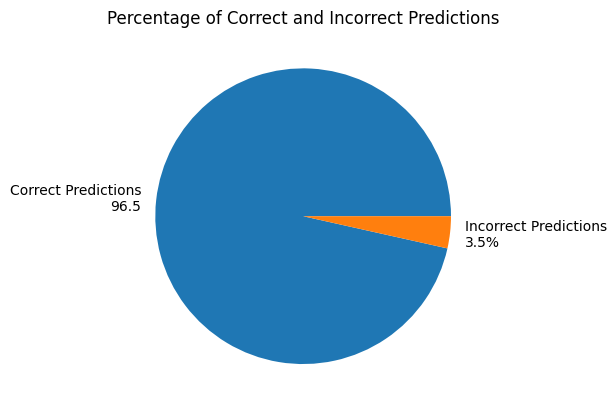

In [ ]:
plot_predictions(predictions, breast_cancer_outputs_testing)